# Spatial Operations in Image Processing

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png  

--2022-09-01 12:07:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7243 (7.1K) [image/jpeg]
Saving to: ‘cameraman.jpeg.4’

cameraman.jpeg.4    100%[===================>]   7.07K  --.-KB/s    in 0s      

2022-09-01 12:07:12 (1.14 GB/s) - ‘cameraman.jpeg.4’ saved [7243/7243]

--2022-09-01 12:07:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cl

In [2]:
# Used to view the images
import matplotlib.pyplot as plt
# Used to perform filtering on an image
import cv2
# Used to create kernels for filtering
import numpy as np

In [3]:
def plot_image(image_1, image_2, title_1='Original', title_2='New Image'):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

## Linear Filtering

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


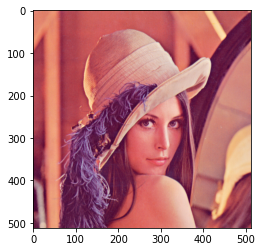

In [4]:
# Loads the image from the specified file
image = cv2.imread('lenna.png')
print(image)
# Converts the order of the color from BGR (Blue Green Red) to RGB (Red Green Blue) then renders the image from the array of data
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

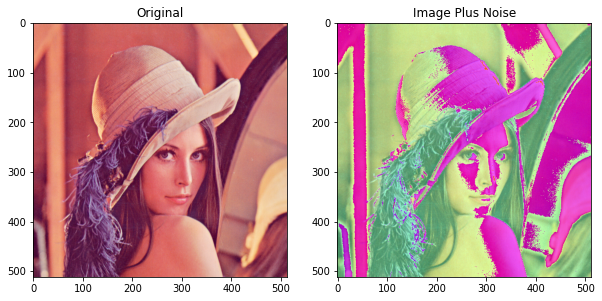

In [5]:
# Get the number of rows and columns in the image
rows, cols, _ = image.shape
# Creates values using a normal distribution with a mean of 0 and standard deviation of 15, the values are converted to unit8 which means the values are between 0 and 255
noise = np.random.normal(0.15, (rows, cols,3)).astype(np.uint8)
# Add the noise to the image
noisy_image = image + noise
# Plots the original image and the image with noise using the function defined at the top
plot_image(image, noisy_image, title_1='Original', title_2='Image Plus Noise')

## Filtering Noise

In [6]:
# Create a kernel which is a 6 by 6 array where each value is 1/36
kernel = np.ones((6,6))/36

In [7]:
# Filters the images using the kernel
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)

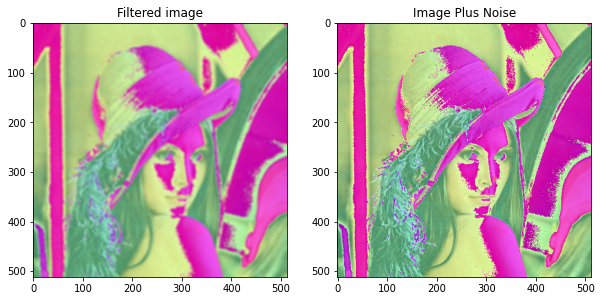

In [9]:
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image, title_1='Filtered image', title_2='Image Plus Noise')

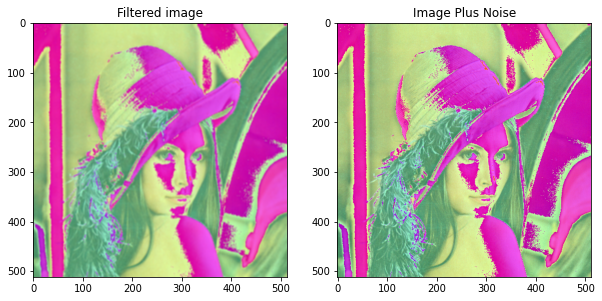

In [10]:
# Creates a kernel which is a 4 by 4 array where each value is 1/16
kernel = np.ones((4,4))/16
# Filters the images using the kernel
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image, title_1='Filtered image', title_2='Image Plus Noise')

## Gaussian Blur

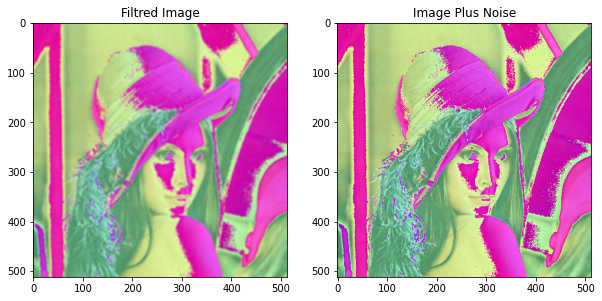

In [11]:
# Filters the images using GaussianBlur on the image with noise using a 4 by 4 kernel 
image_filtered = cv2.GaussianBlur(noisy_image, (5,5), sigmaX=4, sigmaY=4)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered, noisy_image, title_1='Filtred Image', title_2='Image Plus Noise')

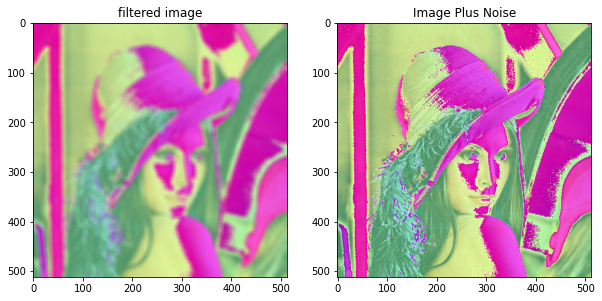

In [13]:
# Filters the images using GaussianBlur on the image with noise using a 11 by 11 kernel 
image_filtered = cv2.GaussianBlur(noisy_image, (11,11), sigmaX=10, sigmaY=10)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered, noisy_image, title_1='filtered image', title_2='Image Plus Noise')

## Image Sharpening

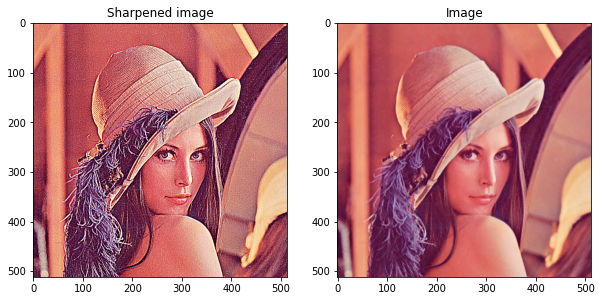

In [15]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1],
                  [-1, 9, -1],
                  [-1, -1, -1]])
# Applys the sharpening filter using kernel on the original image without noise
sharpened = cv2.filter2D(image, -1, kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened, image, title_1="Sharpened image", title_2='Image')

## Edges

[[181 201 202 ... 103 102  92]
 [171 198 201 ...  94  96  96]
 [175 195 193 ...  87  96  98]
 ...
 [100  97  97 ... 114 113 117]
 [ 94  97  99 ... 111 112 114]
 [ 96  95  98 ... 113 104 109]]


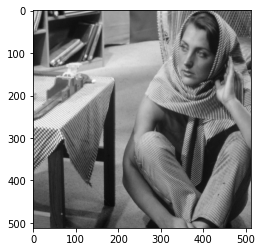

In [16]:
# Loads the image from the specified file
img_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
print(img_gray)
# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray, cmap='gray')

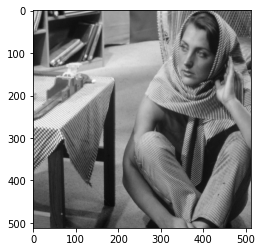

In [17]:
# Filters the images using GaussianBlur on the image with noise using a 3 by 3 kernel 
img_gray = cv2.GaussianBlur(img_gray, (3,3), sigmaX=0.1, sigmaY=0.1)
# Renders the filtered image
plt.imshow(img_gray, cmap='gray')

In [18]:
ddepth = cv2.CV_16S
# Applys the filter on the image in the X direction
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)

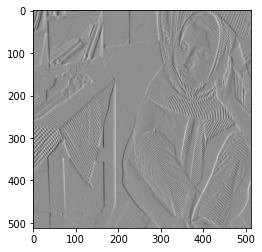

In [19]:
plt.imshow(grad_x, cmap='gray')

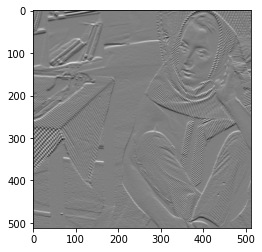

In [20]:
# Applys the filter on the image in the X direction
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y, cmap='gray')

In [21]:
# Converts the values back to a number between 0 and 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

In [22]:
# Adds the derivative in the X and Y direction
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

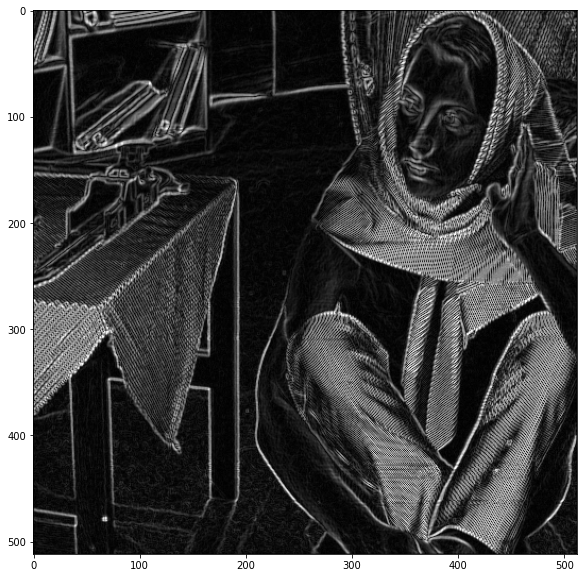

In [23]:
# Make the figure bigger and renders the image
plt.figure(figsize=(10,10))
plt.imshow(grad, cmap='gray')

## Median

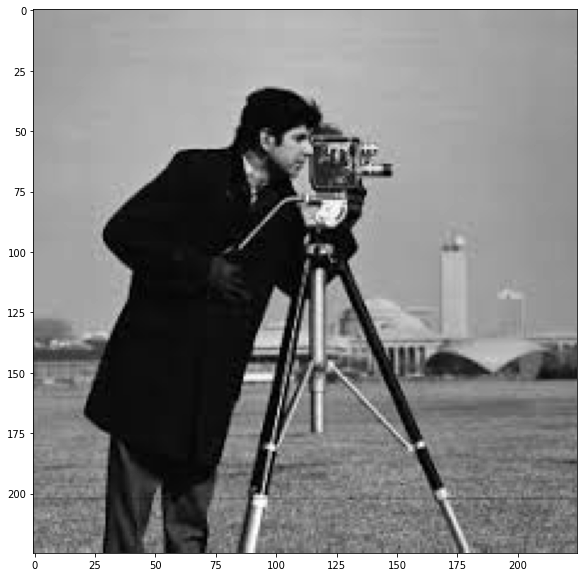

In [24]:
# Load the camera man image
image = cv2.imread('cameraman.jpeg', cv2.IMREAD_GRAYSCALE)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image, cmap='gray')

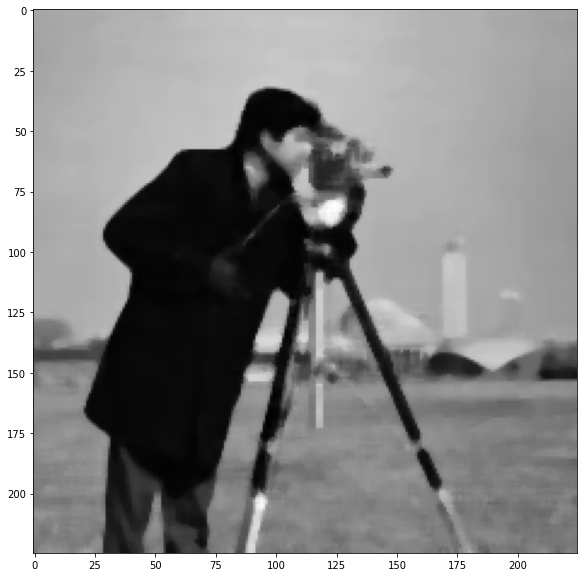

In [25]:
# Filter the image using Median Blur with a kernel of size 5
filtered_image = cv2.medianBlur(image, 5)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(filtered_image, cmap='gray')

## Threshold Function Parameters

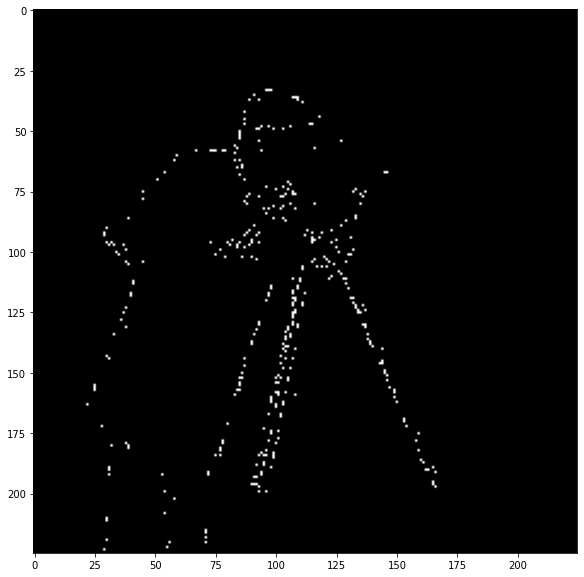

In [26]:
# Returns ret which is the threshold used and outs which is the image
ret, outs = cv2.threshold(src= image, thresh = 0, maxval = 255, type = cv2.THRESH_BINARY_INV)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Render the image
plt.imshow(outs, cmap='gray')